In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
ds2 = xr.open_mfdataset(("/esarchive/exp/ecearth/a247/diags/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r2i1p1f1/Omon/thetao/r360x180/v20200120/thetao_Omon_EC-Earth3_historical_r2i1p1f1_r360x180_19*.nc"))

In [3]:
#ds2.latitude*2*math.pi/360
weights=np.cos(np.deg2rad(ds2.latitude)) # Weights are proportional to the grid cell area, which is influenced by the latituded

In [4]:
t3d=ds2.thetao.resample(time="Y").mean()
t3dw=t3d.weighted(weights)
#LatIndexer, LonIndexer = 'lat', 'lon'
#SliceData = data.sel(**{LatIndexer: slice(max_lat, min_lat),
#                        LonIndexer: slice(max_lon, min_lon)})
#t3d.isel(latitude=slice(30,60), longitude=slice(0,180))
# ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
#t3d

In [5]:
#tt=masked_average(ds2['thetao'], dim=['i','j'], weights=acello)
tg=t3d.mean(("latitude","longitude"))
tgw=t3dw.mean(("latitude","longitude"))
# To double check that weighted and unweighted averages are different
#tg[:,0].plot.line()
#tgw[:,0].plot.line()

In [6]:
# We identify the levels that represent each selected ocean detph
levs=t3d.lev
ilev0=0

for ilev in range(len(levs)):
 tlev = levs[ilev]
 #print(tlev.values)
# if tlev <= 1000: print(ilev)
# if tlev<= 500: print(ilev)
 if tlev<= 500: ilev500=ilev
 if tlev<= 1000: ilev1000=ilev
 if tlev<= 2000: ilev2000=ilev
 if tlev<= 3000: ilev3000=ilev
 if tlev<= 4000: ilev4000=ilev
 if tlev<= 5000: ilev5000=ilev
print(ilev0,ilev500,ilev1000,ilev2000,ilev3000,ilev4000,ilev5000)

0 38 45 53 59 64 69


/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(5500, 0)

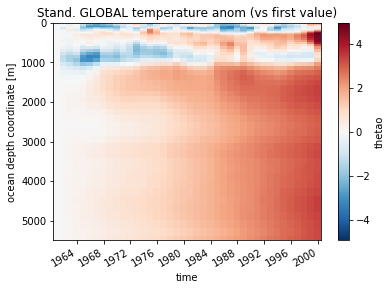

In [7]:
# To compute the temporal anomalies with respect to the initial value
#tga=tg-tg.mean("time")
tga=tg-tg[0,]
# Now standardised with respect to the temporal STD at each respective depth
tgs=tga/tga.std("time")
# And we perform the corresponding hovmoller plot
tgst=tgs.transpose()
tgst.plot()

plt.title("Stand. GLOBAL temperature anom (vs first value)")
plt.ylim((5500,0))

/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(5500, 0)

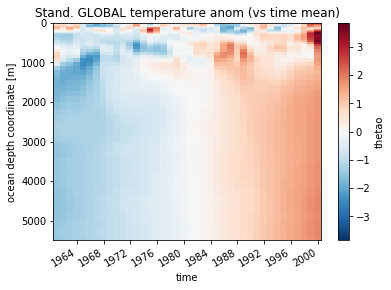

In [8]:
# Now the same but for the anomaly with respet to the temporal mean
tga2=tg-tg.mean("time")
# Now standardised with respect to the temporal STD at each respective depth
tgs2=tga2/tga2.std("time")
# And we perform the corresponding hovmoller plot
tgs2t=tgs2.transpose()
tgs2t.plot()

plt.title("Stand. GLOBAL temperature anom (vs time mean)")
plt.ylim((5500,0))

/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(5500, 0)

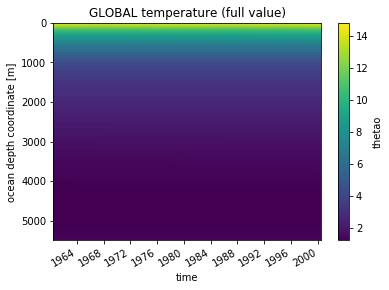

In [9]:
# And now for the absolute temperature values
tgt=tg.transpose()
tgt.plot()

plt.title("GLOBAL temperature (full value)")
plt.ylim((5500,0))

In [ ]:
# We now extract and plot the timeseries for the standardise global anomalies at different levels
tga0=tgs[:,ilev0]
tga500=tgs[:,ilev500]
tga1000=tgs[:,ilev1000]
tga2000=tgs[:,ilev2000]
tga3000=tgs[:,ilev3000]
tga4000=tgs[:,ilev4000]
tga5000=tgs[:,ilev5000]
tga0.plot.line()
tga500.plot.line()
tga1000.plot.line()
tga2000.plot.line()
tga3000.plot.line()
tga4000.plot.line()
tga5000.plot.line()

#t0.plot.line(color="blue",linestyle="dotted")
plt.title("Stand GLOBAL temperature anom (vs initial value)")
plt.legend(["0","500","1000","2000","3000","4000","5000"], loc='best')

/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.e

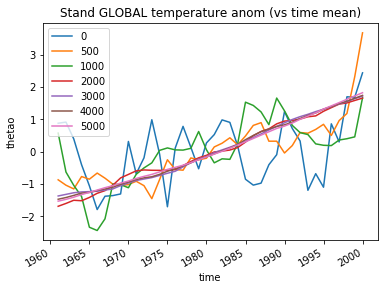

In [62]:
# We now extract and plot the timeseries for the standardise global anomalies at different levels
tga0b=tgs2[:,ilev0]
tga500b=tgs2[:,ilev500]
tga1000b=tgs2[:,ilev1000]
tga2000b=tgs2[:,ilev2000]
tga3000b=tgs2[:,ilev3000]
tga4000b=tgs2[:,ilev4000]
tga5000b=tgs2[:,ilev5000]
tga0b.plot.line()
tga500b.plot.line()
tga1000b.plot.line()
tga2000b.plot.line()
tga3000b.plot.line()
tga4000b.plot.line()
tga5000b.plot.line()

#t0.plot.line(color="blue",linestyle="dotted")
plt.title("Stand GLOBAL temperature anom (vs time mean)")
plt.legend(["0","500","1000","2000","3000","4000","5000"], loc='best')


/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.egg/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/shared/earth/software/dask/2.0.0-foss-2015a-Python-3.7.3/lib/python3.7/site-packages/dask-2.0.0-py3.7.e

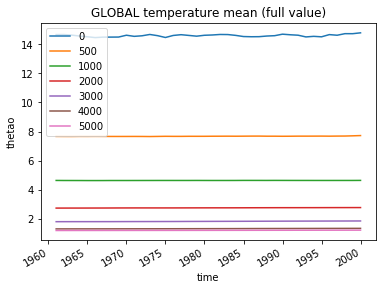

In [63]:
# And we plot the absolute temperature mean values
tg0=tg[:,ilev0]
tg500=tg[:,ilev500]
tg1000=tg[:,ilev1000]
tg2000=tg[:,ilev2000]
tg3000=tg[:,ilev3000]
tg4000=tg[:,ilev4000]
tg5000=tg[:,ilev5000]
tg0.plot.line()
tg500.plot.line()
tg1000.plot.line()
tg2000.plot.line()
tg3000.plot.line()
tg4000.plot.line()
tg5000.plot.line()

#t0.plot.line(color="blue",linestyle="dotted")
plt.title("GLOBAL temperature mean (full value)")
plt.legend(["0","500","1000","2000","3000","4000","5000"], loc='best')